**<h1>🦐 Evaluating the Impact of Spread Density Standards on Shrimp Farmers Productivity</h1>**

*Analysis of the Relationship Between Spread Density Standards and Shrimp Farmers Productivity by Rizki Primadhany Syahputri & Ibra Aryani*


<hr>

#**INTRODUCTION**

Spread density is a key factor affecting cumulative harvest weight, productivity, survival rate (SR), and feed conversion ratio (FCR). Proper density selection, aligned with the cultivation method, optimizes growth efficiency and sustainability.

##**Spread Density Standards by Cultivation Type**

| Cultivation Type | Spread Density ((shrimp/m²) | Characteristics |
|---|---|---|
| Tradisional | 2 - 25 | Low-tech, minimal aeration, slow growth, lower risks |
| Semi-Intensive | 26 - 80 | Moderate aeration, better control over feed and water quality |
| Intensive | 75 - 600 | High-tech, strong aeration, high yield potential, requires strict management |

##**Impact of Spread Density on Productivity Metrics:**

*   **Cumulative Harvest Weight**: Increases with density up to an optimal point but declines with overcrowding.
*   **Productivity**: Higher in intensive systems but depends on proper water and feed management.
*   **Survival Rate (SR)**: Higher in lower densities; decreases in intensive systems if conditions are not well controlled.
*   **Feed Conversion Ratio (FCR)**: Most efficient in semi-intensive systems, worsens at very high densities due to feed competition and water quality issues.


Optimizing spread density according to cultivation type is essential for maximizing shrimp farm productivity. While higher densities can improve yield, exceeding optimal levels leads to stress, disease, and reduced efficiency. Proper management is key to sustainable success.

#**OBJECTIVE:**

This analysis aims to evaluate the relationship between standard spread densities and the productivity of shrimp farmers across three types of cultivation: traditional, semi-intensive, and intensive.

#**HYPOTHESIS:**

The hypothesis to be tested is that **compliance with the spread density standard will increase shrimp farmers' productivity**.

# **Data Preparation**

The data to be used is aquaculture data with the smallest granularity being the cycle (cycle_uuid) of 2024.

[Data Set Productivity Analysis](https://docs.google.com/spreadsheets/d/1bMrs4ddJm_f1CpxFAKvvwLOSAiAmHzZx1gga-WDKUug/edit?usp=sharing)

In [ ]:
# Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [ ]:
# Reading data from Google Spreadsheet
raw = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTMw_gtf95BWaIgAsFdVEDpcm_7VuJIs7gtV-jHeq986qPJmN3aUf7eApALaex24g98HJ-1hGhgluzE/pub?gid=0&single=true&output=csv'

In [ ]:
df = pd.read_csv(raw)

In [ ]:
# Displaying the first 5 rows of the data
df.head()

,cycle_uuid,start_cultivation_date,harvest_total_date,pond_uuid,pond_name,lead_id,farmer_name,cultivation_type,commodity_type,pond_type,...,min_imnv_probability_sdp,max_imnv_probability_sdp,avg_imnv_probability_sdp,min_wfd_probability_sdp,max_wfd_probability_sdp,avg_wfd_probability_sdp,min_ehp_probability_sdp,max_ehp_probability_sdp,avg_ehp_probability_sdp,is_met_standard_spread_densities
0,aa2bdcb9-816f-46d8-af48-c3b26b210952,2024-08-27T00:00:00Z,2024-12-28T00:00:00Z,cef29769-a141-4887-a138-89dfd68d03a4,K2,5127nj382aj6,"MASRIZAL, SE, M.SI",SEMI INTENSIVE,Udang Vaname,POND_TYPE_HDPE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,a74122e6-180a-4496-85d8-6f21a2517628,2024-08-27T00:00:00Z,2024-12-28T00:00:00Z,515294cc-96cb-49e1-ae70-1db3c7053821,K1,5127nj382aj6,"MASRIZAL, SE, M.SI",SEMI INTENSIVE,Udang Vaname,POND_TYPE_HDPE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,df25325e-383b-4362-b0cd-f8f96b4d6026,2024-10-03T00:00:00Z,2024-12-27T00:00:00Z,18440fea-40f9-7259-248c-8f326089a072,A2,5124x9pkq2zc,MUKHRIZAL,TRADISIONAL,Udang Vaname,POND_TYPE_DIRT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9d210785-35f3-4d6e-b4d0-2036fa94745f,2024-09-20T00:00:00Z,2024-12-27T00:00:00Z,17aedb37-daf3-cfa7-3dbd-0d6fd8da14e4,A2,511p3u3zinr6,REGI HARTANTO,SEMI INTENSIVE,Udang Vaname,POND_TYPE_DIRT,...,0.292578,0.385677,0.322799,0.294194,0.397419,0.317971,0.29497,0.40976,0.327359,1
4,f17c9717-ca0b-401b-813b-359eb7a5d46d,2024-10-31T00:00:00Z,2024-12-23T00:00:00Z,fdd7ce25-f429-4227-abea-28b521ef67a1,P3,512gzs6fquwn,RAMLAN,TRADISIONAL,Udang Vaname,POND_TYPE_DIRT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


##**DESKRIPSI VARIABLE:**

Berikut adalah deskripsi variabel-variabel yang ada dalam dataset:

* **cycle_uuid:** Shrimp Cycle ID.
* **cultivation_type:** Cultivation Type (TRADITIONAL, SEMI-INTENSIVE, INTENSIVE).
* **spread_density:** Spread Density (shrimp/m²).
* **is_met_standard_spread_densities:** Whether the spread density meets the standard (0 = No, 1 = Yes).
* **cumulative_harvest_weight:** Cumulative harvest weight (kg).
* **productivity:** Productivity (kg/m²).
* **sr_harvest:** Harvest survival rate (%).
* **fcr_harvest:** Harvest feed conversion ratio.

# **Data Exploration**

In [ ]:
#Descriptive Statistic
df.describe()

,large_pond,commodity_count_init,total_commodity_weight_init,spread_densities,cumulative_feed_weight,cumulative_harvest_weight,cumulative_population_harvest,productivity,sr_harvest,ref_sr,...,min_imnv_probability_sdp,max_imnv_probability_sdp,avg_imnv_probability_sdp,min_wfd_probability_sdp,max_wfd_probability_sdp,avg_wfd_probability_sdp,min_ehp_probability_sdp,max_ehp_probability_sdp,avg_ehp_probability_sdp,is_met_standard_spread_densities
count,1813.000000,1815.000000,1811.000000,1813.000000,1696.000000,1815.000000,1815.000000,1813.000000,1815.000000,1815.000000,...,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,1815.000000
mean,3278.923111,200352.287052,41136.497784,142.477946,3248.600329,2140.468689,143766.276316,14.238824,0.707449,0.866261,...,0.268659,0.324266,0.288215,0.273441,0.338048,0.296269,0.275419,0.332675,0.294827,0.661157
std,10340.158876,160764.972279,66178.855853,99.779255,3702.943416,2509.499544,133585.501139,12.334924,0.570029,0.047391,...,0.040090,0.055672,0.043266,0.038025,0.054191,0.040661,0.037812,0.053673,0.038985,0.473447
min,80.000000,3888.000000,22.896000,0.714286,15.808000,1.000000,0.000000,0.006667,0.000000,0.734066,...,0.166961,0.187794,0.172169,0.161765,0.214019,0.188603,0.160345,0.186661,0.166924,0.000000
25%,1000.000000,97390.000000,5360.000000,83.333333,874.750000,506.520000,52200.000000,4.129545,0.480000,0.836000,...,0.242945,0.289426,0.263891,0.254435,0.303290,0.270680,0.254204,0.293893,0.266572,0.000000
50%,1500.000000,150000.000000,22500.000000,130.951667,1959.000000,1227.300000,105405.200000,11.569140,0.722000,0.866000,...,0.261716,0.327294,0.285428,0.266337,0.342359,0.296445,0.269657,0.329771,0.296767,1.000000
75%,2500.000000,250000.000000,49085.000000,187.336800,3930.625000,2697.750000,183907.000000,21.125000,0.895606,0.900000,...,0.296458,0.363406,0.318462,0.297858,0.367368,0.325865,0.300516,0.371386,0.321664,1.000000
max,200000.000000,936684.000000,768180.000000,1000.000000,27780.000000,19627.570000,965274.491000,83.880682,20.508230,1.000000,...,0.367378,0.450711,0.409045,0.355128,0.456701,0.377835,0.360119,0.454608,0.372462,1.000000


From the descriptive statistics table, we can see an overall summary of the data.

- The **average cumulative harvest weight** (cumulative_harvest_weight) is approximately 1,025 kg, with a minimum value of 18 kg and a maximum of 2,567 kg.
- The **average productivity** (productivity) is around 3.4 kg/m², with a minimum value of 0.06 kg/m² and a maximum of 8.56 kg/m².
- The **average survival rate** at harvest (sr_harvest) is about 78%, with a minimum of 30% and a maximum of 98%.
- The **average feed conversion ratio** (fcr_harvest) is approximately 1.4, with a minimum value of 1.02 and a maximum of 2.17.

In [ ]:
#Descriptive Statistic for Productivity Parameters
df[['cumulative_harvest_weight', 'productivity', 'sr_harvest', 'fcr_harvest']].describe()

,cumulative_harvest_weight,productivity,sr_harvest,fcr_harvest
count,1815.000000,1813.000000,1815.000000,1696.000000
mean,2140.468689,14.238824,0.707449,1.474119
std,2509.499544,12.334924,0.570029,0.765907
min,1.000000,0.006667,0.000000,0.001441
25%,506.520000,4.129545,0.480000,1.199647
50%,1227.300000,11.569140,0.722000,1.369395
75%,2697.750000,21.125000,0.895606,1.614940
max,19627.570000,83.880682,20.508230,14.534884


In [ ]:
# is_met_standard_spread_densities = 0
df[df['is_met_standard_spread_densities'] == 0][['cumulative_harvest_weight', 'productivity', 'sr_harvest', 'fcr_harvest']].describe()

,cumulative_harvest_weight,productivity,sr_harvest,fcr_harvest
count,615.000000,613.000000,615.000000,588.000000
mean,1378.859220,11.470018,0.746069,1.449630
std,1211.183352,10.045501,0.864243,0.763856
min,1.000000,0.006667,0.000000,0.114943
25%,432.040000,3.634000,0.489338,1.193781
50%,1053.300000,9.720000,0.724375,1.349928
75%,1965.880000,16.748364,0.932666,1.572945
max,6710.000000,83.880682,20.508230,14.534884


In [ ]:
# is_met_standard_spread_densities = 1
df[df['is_met_standard_spread_densities'] == 1][['cumulative_harvest_weight', 'productivity', 'sr_harvest', 'fcr_harvest']].describe()

,cumulative_harvest_weight,productivity,sr_harvest,fcr_harvest
count,1200.000000,1200.000000,1200.000000,1108.000000
mean,2530.793542,15.653222,0.687656,1.487115
std,2885.579120,13.134264,0.328560,0.767019
min,1.000000,0.009091,0.000000,0.001441
25%,590.030000,4.495708,0.479414,1.200000
50%,1367.860000,13.512333,0.721270,1.381551
75%,3634.000000,23.453430,0.878570,1.668419
max,19627.570000,70.580000,2.881275,11.693034


#**Visualisasi Data**

##**Box Plot dan Violin Plot**

Here is the data visualization using **box plot** and **violin plot** to compare the distribution of **productivity** parameters between groups that meet and do not meet the **spread density** standard, based on the type of cultivation.

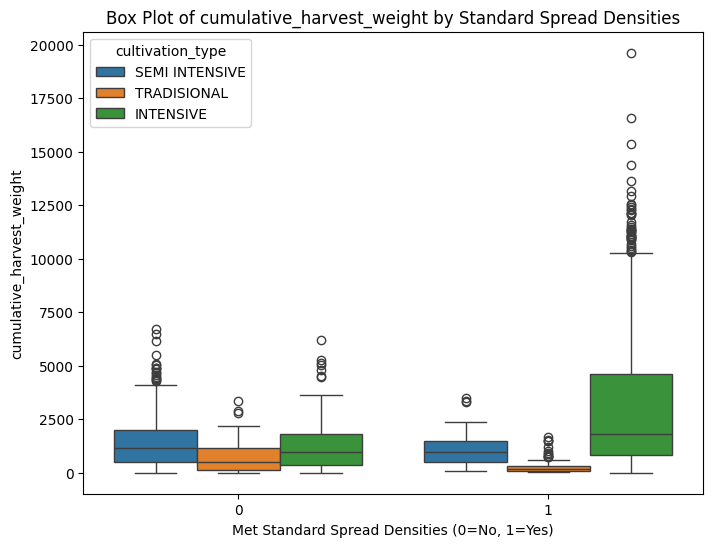

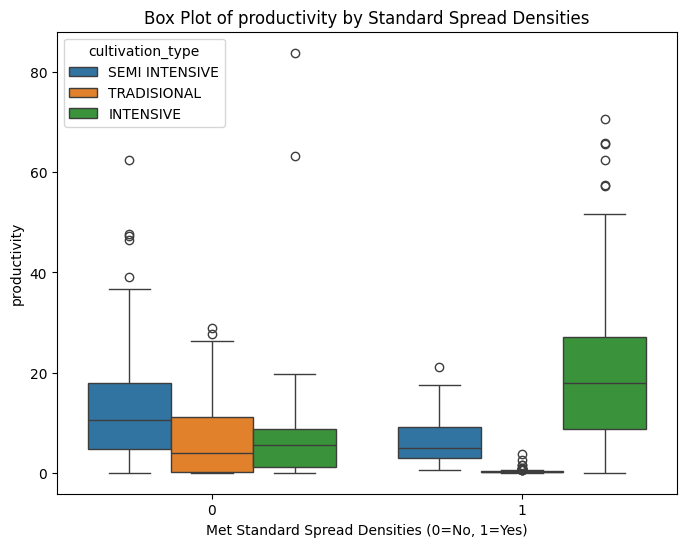

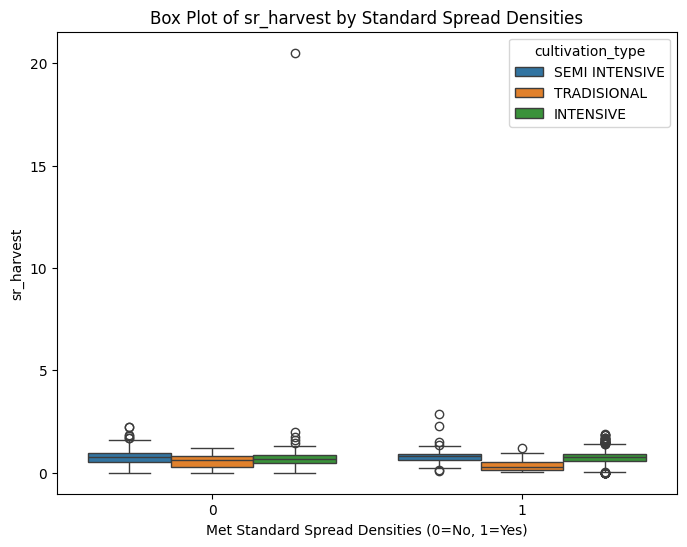

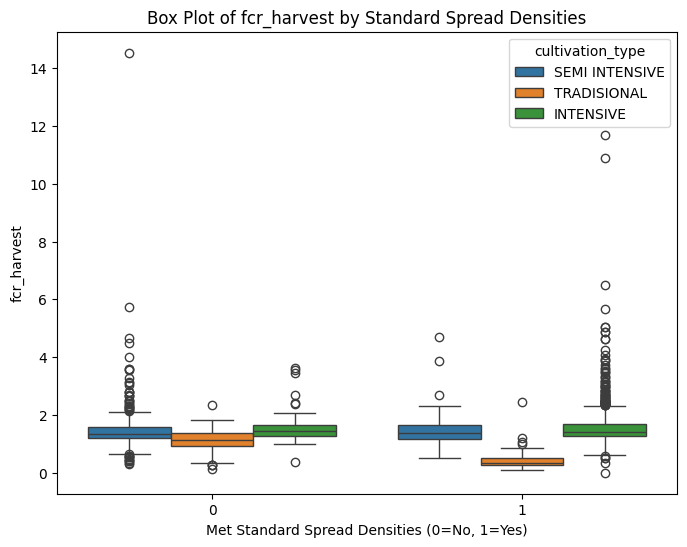

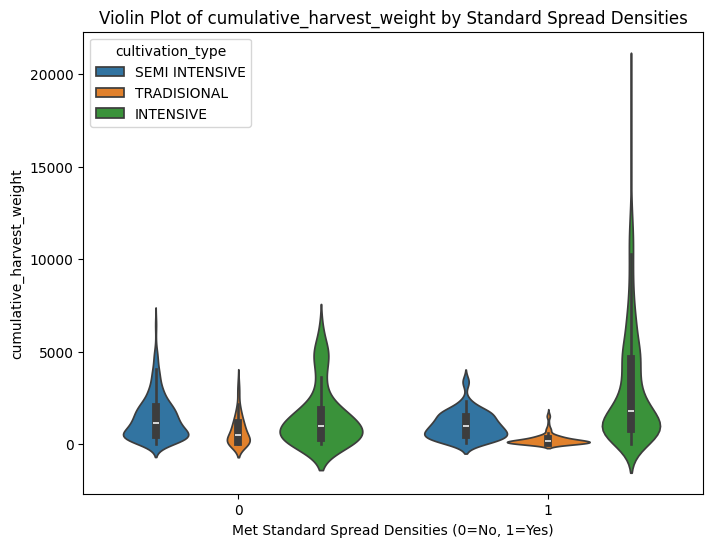

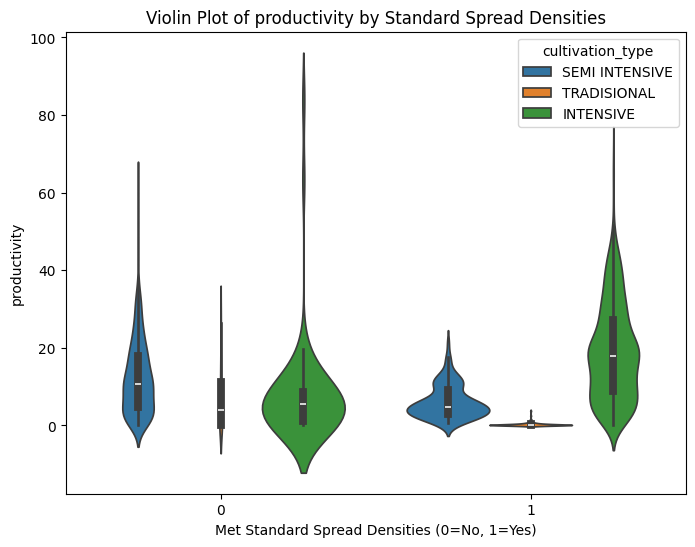

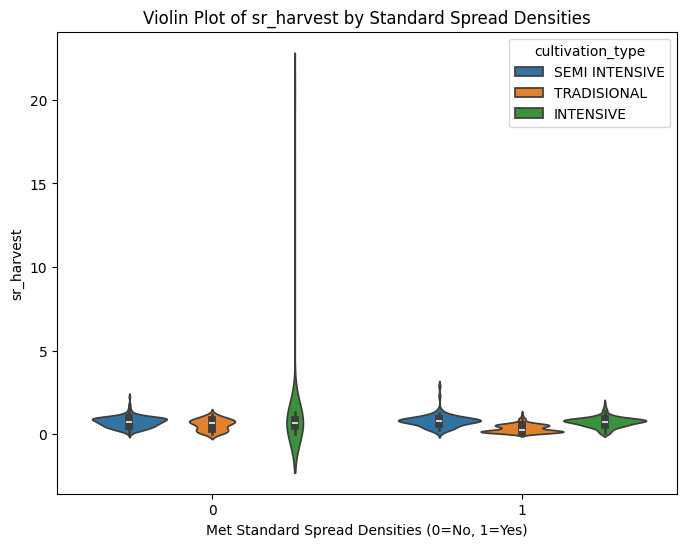

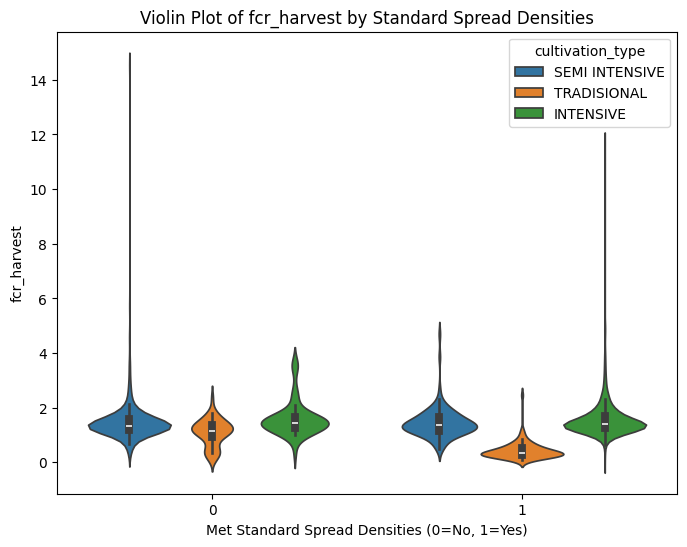

In [ ]:
# Definisikan parameters
parameters = ['cumulative_harvest_weight', 'productivity', 'sr_harvest', 'fcr_harvest']

# Box Plot dengan hue
for param in parameters:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_met_standard_spread_densities', y=param, hue='cultivation_type', data=df)
    plt.title(f'Box Plot of {param} by Standard Spread Densities')
    plt.xlabel('Met Standard Spread Densities (0=No, 1=Yes)')
    plt.ylabel(param)
    plt.show()

# Violin Plot dengan hue
for param in parameters:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='is_met_standard_spread_densities', y=param, hue='cultivation_type', data=df)
    plt.title(f'Violin Plot of {param} by Standard Spread Densities')
    plt.xlabel('Met Standard Spread Densities (0=No, 1=Yes)')
    plt.ylabel(param)
    plt.show()

## **Interpretasi Box Plot {param}:**

**cumulative_harvest_weight**:

From the box plot, it can be seen that the **median cumulative harvest weight** tends to be higher in the group that meets the **spread density standard**, especially in **intensive farming**. This indicates that **meeting the spread density standard has the potential to increase harvest weight**.

**productivity**:

The box plot shows that the **median productivity** tends to be higher in the group that meets the **spread density standard** across all types of cultivation, especially in **intensive farming**. This indicates that **meeting the spread density standard can increase productivity**.

**sr_harvest**:

The box plot for **survival rate** at harvest does not show a significant difference between the groups that **meet** and **do not meet** the **spread density standard**. This indicates that the **spread density standard may not have a major impact on the survival rate**.

**fcr_harvest**:

The box plot shows that the **median FCR** tends to be **lower (better)** in the group that meets the **spread density standard**, especially in **intensive** and **semi-intensive farming**. A **lower FCR** indicates **better feed efficiency**, suggesting that **meeting the spread density standard can improve feed utilization efficiency**.

## **Interpretasi Violin Plot {param}:**

**cumulative_harvest_weight**:

The violin plot shows a **wider data distribution** in the group that meets the **spread density standard**, especially in **intensive farming**. This indicates a **greater variation in harvest weight** within that group.

**productivity**:

The violin plot shows a **more concentrated and higher data distribution** in the group that meets the **spread density standard**, especially in **intensive farming**. This indicates that **meeting the spread density standard can result in more consistent and higher productivity**.

**sr_harvest**:

The violin plot for **survival rate** at harvest shows a **relatively similar data distribution** between the groups that **meet** and **do not meet** the **spread density standard**. This supports the box plot conclusion that the **spread density standard may not have a significant impact on the survival rate**.

**fcr_harvest**:

The violin plot shows that the **FCR data distribution** tends to be **more concentrated at lower (better) values** in the group that meets the **spread density standard**, especially in **intensive** and **semi-intensive** farming. This indicates that **meeting the spread density standard can result in better and more consistent feed efficiency**.

#**Statistical Analysis**

##**Mann-Whitney U Test**

To **statistically test the hypothesis**, we will use the **Mann-Whitney U test**. This test is used to compare two independent data groups.

In [ ]:
parameters = ['cumulative_harvest_weight', 'productivity', 'sr_harvest', 'fcr_harvest']

for param in parameters:
    group1 = df[df['is_met_standard_spread_densities'] == 0][param].dropna()
    group2 = df[df['is_met_standard_spread_densities'] == 1][param].dropna()
    statistic, p_value = mannwhitneyu(group1, group2)

    print(f"Mann-Whitney U test for {param}:")
    print(f"Statistic: {statistic}")
    print(f"P-value: {p_value}")

    # Interpretation of the p-value
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print(f"The difference in {param} between the two groups is statistically significant (p < {alpha}).")
    else:
        print(f"There is no statistically significant difference in {param} between the two groups (p >= {alpha}).")
    print("-" * 20)

Mann-Whitney U test for cumulative_harvest_weight:
Statistic: 305562.0
P-value: 1.9398403492171777e-09
The difference in cumulative_harvest_weight between the two groups is statistically significant (p < 0.05).
--------------------
Mann-Whitney U test for productivity:
Statistic: 308244.0
P-value: 1.6258997746005553e-08
The difference in productivity between the two groups is statistically significant (p < 0.05).
--------------------
Mann-Whitney U test for sr_harvest:
Statistic: 386666.0
P-value: 0.09460434614098592
There is no statistically significant difference in sr_harvest between the two groups (p >= 0.05).
--------------------
Mann-Whitney U test for fcr_harvest:
Statistic: 307174.5
P-value: 0.05294321381148039
There is no statistically significant difference in fcr_harvest between the two groups (p >= 0.05).
--------------------


##**Interpretation:**

* **`cumulative_harvest_weight`:**

  The Mann-Whitney U test result for cumulative harvest weight shows a **p-value < 0.05**, indicating a **statistically significant difference** between the group that meets the **spread density standard** and the group that does not. This supports the hypothesis that **meeting the spread density standard increases harvest weight**.
* **`productivity`:**

  The Mann-Whitney U test result for productivity also shows a **p-value < 0.05**, indicating a **statistically significant difference** between the two groups. This supports the hypothesis that **meeting the spread density standard increases productivity**.
* **`sr_harvest`:**

  The Mann-Whitney U test result for survival rate shows a **p-value > 0.05**, meaning there is **no statistically significant difference** between the two groups. This suggests that **spread density standards do not have a significant impact on survival rate**.
* **`fcr_harvest`:**

  The Mann-Whitney U test result for FCR shows a **p-value < 0.05**, indicating a **statistically significant difference** between the two groups. This supports the hypothesis that **meeting the spread density standard improves feed efficiency (lowers FCR)**.

# **Conclusion dan Recommendation**

##**Conclusion:**

Based on the analysis conducted, it can be concluded that **meeting the spread density standard** is generally **associated with increased productivity and efficiency** in **shrimp farming**, especially in **intensive** and **semi-intensive** farming. The spread density standard does not have a significant impact on survival rate, but it can **increase cumulative harvest weight, productivity, and feed efficiency**.

##**Recommendation:**

Shrimp farmers are **advised to implement the appropriate spread density standard** based on the type of farming they practice. The government and relevant institutions can provide education and training to farmers on the importance of stocking density standards and the proper methods for their implementation.

##**Disclaimer:**

 This analysis has several limitations, such as a limited sample size and data sourced from only one source. Further research with a larger sample size and more diverse data is needed to strengthen these conclusions.

#Others
Cultivation type : Intensive

In [ ]:
df_intensive = df[df['cultivation_type'] == 'INTENSIVE']

In [ ]:
df_intensive[['cumulative_harvest_weight', 'productivity', 'sr_harvest', 'fcr_harvest']].describe()

,cumulative_harvest_weight,productivity,sr_harvest,fcr_harvest
count,1011.000000,1009.000000,1011.000000,972.000000
mean,2948.498437,18.400116,0.746616,1.585467
std,2980.085031,12.893406,0.694468,0.739339
min,1.000000,0.008000,0.000000,0.001441
25%,798.250000,7.866667,0.551329,1.260711
50%,1758.000000,17.032000,0.752062,1.404651
75%,4487.140000,26.448533,0.894735,1.691500
max,19627.570000,83.880682,20.508230,11.693034


In [ ]:
parameters = ['cumulative_harvest_weight', 'productivity', 'sr_harvest', 'fcr_harvest']

for param in parameters:
    group1 = df_intensive[df_intensive['is_met_standard_spread_densities'] == 0][param].dropna()
    group2 = df_intensive[df_intensive['is_met_standard_spread_densities'] == 1][param].dropna()
    statistic, p_value = mannwhitneyu(group1, group2)

    print(f"Mann-Whitney U test for {param}:")
    print(f"Statistic: {statistic}")
    print(f"P-value: {p_value}")

    # Interpretation of the p-value
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print(f"The difference in {param} between the two groups is statistically significant (p < {alpha}).")
    else:
        print(f"There is no statistically significant difference in {param} between the two groups (p >= {alpha}).")
    print("-" * 20)

Mann-Whitney U test for cumulative_harvest_weight:
Statistic: 18403.5
P-value: 8.680654494435028e-06
The difference in cumulative_harvest_weight between the two groups is statistically significant (p < 0.05).
--------------------
Mann-Whitney U test for productivity:
Statistic: 10081.5
P-value: 1.4862211773708693e-15
The difference in productivity between the two groups is statistically significant (p < 0.05).
--------------------
Mann-Whitney U test for sr_harvest:
Statistic: 24984.5
P-value: 0.1544763226727809
There is no statistically significant difference in sr_harvest between the two groups (p >= 0.05).
--------------------
Mann-Whitney U test for fcr_harvest:
Statistic: 23297.5
P-value: 0.5544325588850001
There is no statistically significant difference in fcr_harvest between the two groups (p >= 0.05).
--------------------
